<div><div style="float:left; clear:both;"><img src="img/colab.png" align="left" width="200" height="200" /><br></div><div style="float:left; clear:both;"><a href="https://colab.research.google.com/drive/1tnOvFNgXiLtktiSsltTr0s308LZSsEPJ">Abre este Jupyter en Google Colab</a></div></div>

# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

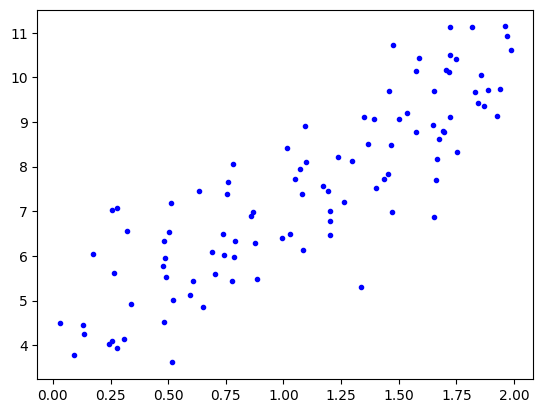

In [ ]:
plt.plot(X, y, "b.")
plt.show()

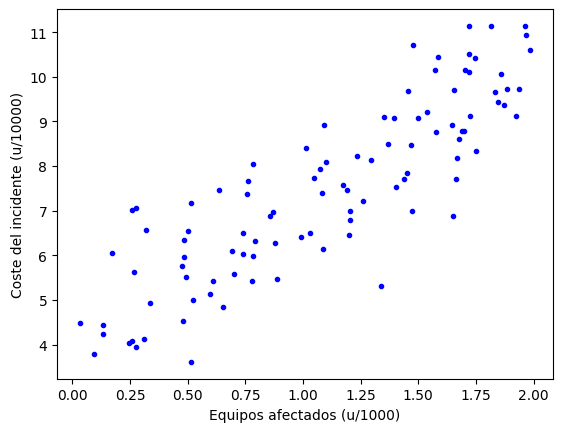

In [ ]:
plt.plot(X, y, "b.")# b. indica el color
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

### 3. Modificación del conjunto de datos

In [ ]:
import pandas as pd

. The value X.flatten() suggests that X is likely a numpy array or similar structure that's being flattened into a 1D array. The flatten() method converts a multi-dimensional array into a single dimension.

In [ ]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,1.336607,5.313021
1,0.635067,7.460014
2,0.484383,5.954258
3,0.502016,6.540006
4,0.596171,5.124415
5,1.071913,7.936038
6,0.760562,7.662857
7,1.394834,9.076364
8,1.646932,8.928424
9,0.739854,6.489762


**Mejorar la Estabilidad Numérica**: Los algoritmos de regresión lineal pueden ser
sensibles a la escala de las variables. Variables con valores muy grandes o muy pequeños pueden causar problemas numéricos durante el cálculo, como la precisión de los números flotantes.

**Convergencia más Rápida:** En métodos de regresión que utilizan técnicas de optimización iterativa, como el descenso de gradiente, el escalado puede ayudar a que el algoritmo converja más rápidamente hacia la solución óptima.

**Uniformidad en la Importancia de los Atributos:** Si las variables tienen diferentes unidades de medida o rangos, escalándolas se asegura que cada una contribuya equitativamente al modelo. Sin el escalado, una variable con un rango mucho mayor podría dominar la función de coste y sesgar el modelo.

**Mejora en la Interpretación de los Parámetros:** Cuando las variables se escalan, los coeficientes resultantes del modelo reflejan la importancia de cada característica en la misma escala, lo que facilita su interpretación.

**Requisito para Algunos Algoritmos:** Algunos algoritmos de regresión,
especialmente aquellos que incluyen regularización (como Lasso o Ridge), asumen que todas las características están centradas alrededor de cero y tienen varianzas similares.

In [ ]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,1336,53130
1,635,74600
2,484,59542
3,502,65400
4,596,51244
5,1071,79360
6,760,76628
7,1394,90763
8,1646,89284
9,739,64897


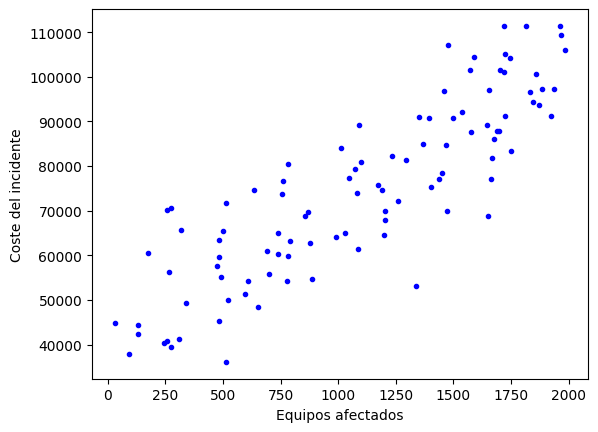

In [ ]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

In [ ]:
from sklearn.linear_model import LinearRegression

la siguiente seccion , aplica la funcion de coste y optimizacion incluida , ya devuelve el modelo entrenado , y los valores thetas mas optimos.

.reshape(-1, 1): Reshapes the array into a two-dimensional array with one column. The -1 tells NumPy to automatically calculate the number of rows based on the length of the array.

In [ ]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)

LinearRegression()

In [ ]:
# Parámetro theta 0
lin_reg.intercept_

41428.06481021268

In [ ]:
# Parámetro theta 1
lin_reg.coef_

array([30.29308137])

In [ ]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

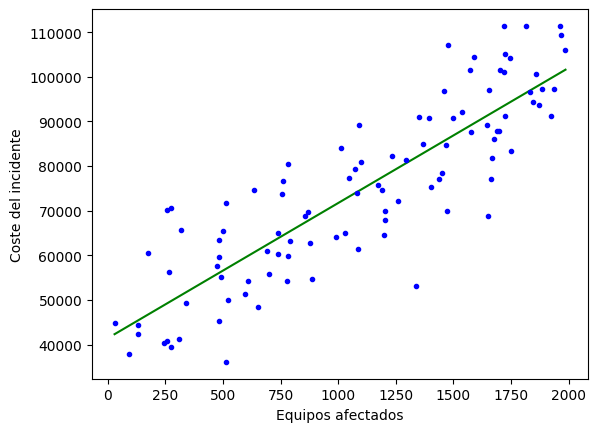

In [ ]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")#This line plots the prediction line generated by the linear regression model.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [ ]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new)

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 80809 €


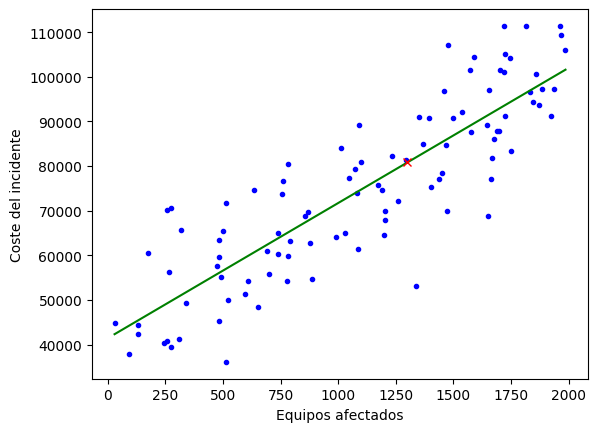

In [ ]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()